In [85]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# Load transect densities from Soviet NP data

In [86]:
ef = pd.ExcelFile('../data/transect_densities.xlsx')

sns  = ef.sheet_names

dfs = []

for sn in sns:
    
    df = pd.read_excel('../data/transect_densities.xlsx',sheet_name=sn)
    
    dfs.append(df)
    
len(dfs)

24

# Calculate mean density of each transect, and append to list along with day of year the transect was done on

In [113]:
datetime.date(2001,9,1) - datetime.date(2001,1,1)

datetime.timedelta(days=243)

In [88]:
mean_densities = []

measurement_counter = 0

for df in dfs:
    
#     print(df)
    
    for col in df.columns[1:]:
        
        count = np.count_nonzero(np.nan_to_num(df[col]))
        measurement_counter+=count

        mean_densities.append( {'doy':col.timetuple().tm_yday,
                                    'den': np.nanmean(df[col])*1000,
                                    }
                                )
        
print(measurement_counter)

4588


/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [90]:
len(mean_densities)

580

# Turn into dataframe and visualise evolution of transect mean density

[]

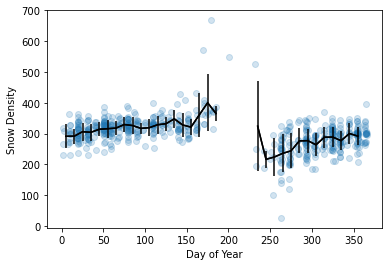

In [91]:
df = pd.DataFrame(mean_densities)

df.dropna(inplace=True)
    
bins = np.arange(0,361,10)

bcs = np.arange(5,361,10)
            
means, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='mean')
       
stds, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='std')

            
    
plt.scatter(df['doy'], df['den'],alpha=0.2)

plt.plot(bcs,means,color='k')
plt.errorbar(x=bcs,y=means,yerr=stds,color='k')

plt.ylabel('Snow Density')
plt.xlabel('Day of Year')

plt.plot()

# Make data continuous over 1st January, by shifting the discontinuity to 200th day of year

In [131]:
datetime.date(2001,8,1) - datetime.date(2001,1,1)

datetime.timedelta(days=212)

In [132]:
day_thresh = 242 #1 September
day_thresh = 212 #1 August

df['doy_adj'] = [d-365 if d>day_thresh else d for d in df['doy']]

# Generate x-ticks and x-ticks label

In [140]:
month_start_doys = [0]
counter = 0
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for d in [31,28,31,30,31,30,31,31,31,31,30]:
    counter +=d
    month_start_doys.append(counter)

xticks = [d-365 if d>=day_thresh else d for d in month_start_doys]

In [147]:
sorted(zip(xticks,month_names))

[(-153, 'Aug'),
 (-122, 'Sep'),
 (-91, 'Oct'),
 (-60, 'Nov'),
 (-30, 'Dec'),
 (0, 'Jan'),
 (31, 'Feb'),
 (59, 'Mar'),
 (90, 'Apr'),
 (120, 'May'),
 (151, 'Jun'),
 (181, 'Jul')]

# Plot the data over the winter season

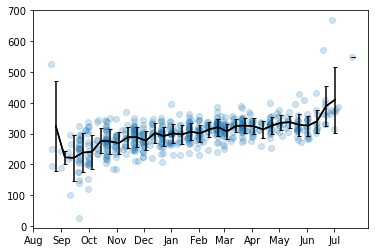

In [142]:
bins = np.arange(day_thresh-365,day_thresh+1,10)            

means, bin_edges, bn = binned_statistic(df['doy_adj'],
                                            df['den'],
                                            bins=bins,
                                            statistic='mean')
       
stds, bin_edges, bn = binned_statistic(df['doy_adj'],
                                            df['den'],
                                            bins=bins,
                                            statistic='std')

            
    
plt.scatter(df['doy_adj'], df['den'],alpha=0.2)

plt.plot(bins[:-1]+5,means,color='k')
plt.errorbar(x=bins[:-1]+5,y=means,yerr=stds,color='k',capsize=2)

plt.xticks(xticks,labels=month_names)
plt.show()

# Fit a 1st order polynomial to the data.

Turns out that this is basically the same as fitting a 2 or 3rd order one! Line only curves when you get to 4th order.

In [146]:
xs

array([-153, -148, -143, -138, -133, -128, -123, -118, -113, -108, -103,
        -98,  -93,  -88,  -83,  -78,  -73,  -68,  -63,  -58,  -53,  -48,
        -43,  -38,  -33,  -28,  -23,  -18,  -13,   -8,   -3,    2,    7,
         12,   17,   22,   27,   32,   37,   42,   47,   52,   57,   62,
         67,   72,   77,   82,   87,   92,   97,  102,  107,  112,  117,
        122,  127,  132,  137,  142,  147,  152,  157,  162,  167,  172,
        177,  182,  187,  192,  197,  202,  207])

In [149]:
def den_from_doy(doy):
    if doy>day_thresh:
        doy_adj = doy-365
    else:
        doy_adj = doy
        
    den = p[0] + p[1]*doy_adj
    
    return den

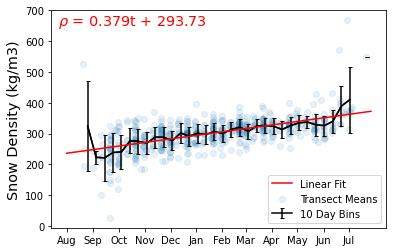

 
0.3786 x + 293.7


In [152]:
x = df['doy_adj']
y = df['den']
z = np.polyfit(x,y,1)

p = np.poly1d(z)

xs = np.arange(day_thresh-365,day_thresh,5)

dens_plot = [den_from_doy(d) for d in xs]

plt.plot(xs,dens_plot,color='r',label='Linear Fit',
         zorder=5)

plt.scatter(x,y,alpha=0.1,label='Transect Means')


plt.plot(bins[:-1]+5,means,color='k')
plt.errorbar(x=bins[:-1]+5,y=means,yerr=stds,color='k',capsize=2,label='10 Day Bins')

plt.xticks(xticks,labels=month_names)
plt.legend(loc='lower right')


plt.ylabel('Snow Density (kg/m3)',fontsize='x-large')

plt.annotate(fr'$\rho$ = {np.round(p[1],decimals=3)}t + {np.round(p[0],decimals=2)}',
             xy=(0.02,0.93),xycoords='axes fraction',fontsize='x-large',color='r')

odir = '/home/robbie/Dropbox/Apps/Overleaf/Conductivity/'

plt.savefig(f'{odir}densification.jpg',bbox_inches='tight',dpi=400)

plt.show()

print(p)